# Final Data Analysis

***

## Project Description

For this assignment, you will need to imagine that you are a statistical consultant who has recently been hired by a real estate investment firm based in Ames, Iowa. They have had an intern collect and collate all of the recent house sales in Ames and have put together a large spreadsheet that contains the sale price of each house along with many of its physical features. Your employers want you to take this data and develop a model to predict the selling price of a given home.  They hope to use this information to help assess whether the asking price of a house is higher or lower than the true value of the house.  If the home is undervalued, it may be a good investment for the firm.

Your employers are savvy and have been successfully investing in real estate for a long time but they hope a more model-based approach will help focus their search, improving efficiency and the bottom line. The firm plans to use a combination of your model and industry professional expertise to make its investment decisions. Because of this, the firm is not willing to accept a black box solution - they have specified that they must be able to understand the details of your model, including its strengths and its weaknesses. None of the current employees at the firm have any experience or expertise in statistics, statistical inference or modeling - for example you should not assume they will know what a p-value or a linear regression is. As such you will need to explain all of your approaches in layman's terms throughout this project.

Learner note: In order for you to be able to better assess the quality of the model you will produce, the data have been randomly divided into three separate data sets: a training data set, a test data set, and a validation data set. Initially you will use the training data set; the others will be used later for comparison purposes.

## Part 1 - Exploratory Data Analysis (EDA)

When you first get your data, it's very tempting to immediately begin fitting models and assessing how they perform.  However, before you begin modeling, it's absolutely essential to explore the structure of the data and the relationships between the variables in the data set.

Do a detailed EDA of the ames_train data set, to learn about the structure of the data and the relationships between the variables in the data set (refer to Introduction to Probability and Data, Week 2, for a reminder about EDA if needed). Your EDA should involve creating and reviewing many plots/graphs and considering the patterns and relationships you see. 

After you have explored completely, submit the three graphs/plots that you found most informative during your EDA process, and briefly explain what you learned from each (why you found each informative).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn
from sklearn.feature_selection import SelectKBest, f_regression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats


from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

#from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
#from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
#from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')


from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("amestrain.csv")

In [3]:
df

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,238.00,Unf,0.00,618.00,856.00,GasA,TA,Y,SBrkr,856,0,0,1.00,0.00,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.00,Unf,2.00,399.00,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.00,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.00,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.00,ALQ,393.00,104.00,1049.00,GasA,TA,Y,SBrkr,1049,0,0,1.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.00,Fin,1.00,266.00,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.00,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.00,Gd,TA,BrkTil,TA,TA,No,ALQ,737.00,Unf,0.00,100.00,837.00,GasA,Ex,Y,SBrkr,1001,0,0,0.00,0.00,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.00,Unf,1.00,216.00,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.00,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.00,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.00,Unf,0.00,405.00,405.00,GasA,Gd,Y,SBrkr,717,322,0,0.00,0.00,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.00,Unf,1.00,281.00,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.00,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,TA,No,GLQ,643.00,Unf,0.00,167.00,810.00,GasA,Ex,Y,SBrkr,810,855,0,1.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.00,Fin,2.00,528.00,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,907290250,848,145000,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,205.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,662.00,Unf,0.00,186.00,848.00,GasA,Ex,Y,SBrkr,848,0,0,1.00,0.00,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2004.00,RFn,2.00,420.00,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
996,528480150,1576,197000,60,FV,65.00,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,Gd,No,Unf,0.00,Unf,0.00,770.00,770.00,GasA,Ex,Y,SBrkr,778,798,0,0.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2006.00,RFn,2.00,614.00,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial
997,534427010,1728,84900,90,RL,98.00,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.00,TA,TA,CBlock,TA,TA,No,BLQ,1500.00,Unf,0.00,228.00

In [4]:
df["Sale.Condition"].value_counts()

Normal     834
Partial     82
Abnorml     61
Family      17
Alloca       4
AdjLand      2
Name: Sale.Condition, dtype: int64

In [5]:
# Using normal sale conditions

df2 = df[df["Sale.Condition"] == "Normal"]

In [6]:
df2.describe(include='all')

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
count,834.00,834.00,834.00,834.00,834,678.00,834.00,834,53,834,834,834,834,834,834,834,834,834,834,834.00,834.00,834.00,834.00,834,834,834,834,830,830.00,834,834,834,814,814,813,814,834.00,814,834.00,834.00,834.00,834,834,834,834,834.00,834.00,834.00,834.00,834.00,834.00,834.00,834.00,834.00,834,834.00,834,834.00,420,799,798.00,798,834.00,834.00,798,798,834,834.00,834.00,834.00,834.00,834.00,834.00,3,179,28,834.00,834.00,834.00,834,834
unique,NaN,NaN,NaN,NaN,6,NaN,NaN,2,2,4,4,1,5,3,27,9,5,5,7,NaN,NaN,NaN,NaN,5,5,12,12,4,NaN,4,4,5,5,5,4,6,NaN,6,NaN,NaN,NaN,5,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,6,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,1
top,NaN,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,CBlock,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,TA,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,NaN,NaN,656,NaN,NaN,832,28,522,757,834,590,800,140,732,825,687,422,NaN,NaN,NaN,NaN,654,822,262,259,516,NaN,540,711,381,389,763,538,236,NaN,711,NaN,NaN,NaN,824,407,789,776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446,NaN,777,NaN,201,505,NaN,382,NaN,NaN,757,768,745,NaN,NaN,NaN,NaN,NaN,NaN,1,105,24,NaN,NaN,NaN,797,834
mean,713844612.59,1450.05,174622.27,57.86,NaN,68.51,10227.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,5.64,1970.00,1983.03,NaN,NaN,NaN,NaN,NaN,95.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453.26,NaN,52.44,517.70,1023.39,NaN,NaN,NaN,NaN,1127.31,318.22,4.52,0.44,0.06,1.50,0.38,2.81,1.04,NaN,6.27,NaN,0.59,NaN,NaN,1975.94,NaN,1.72,460.87,NaN,NaN,NaN,93.18,45.31,24.00,3.19,14.87,1.75,NaN,NaN,NaN,53.12,6.16,2007.84,NaN,NaN
std,188932275.99,491.48,72269.79,43.33,NaN,24.15,10353.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34,1.10,29.05,20.15,NaN,NaN,NaN,NaN,NaN,176.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.50,NaN,174.13,405.71,401.13,NaN,NaN,NaN,NaN,360.03,421.90,51.24,0.52,0.24,0.54,0.50,0.81,0.19,NaN,1.53,NaN,0.66,NaN,NaN,24.73,NaN,0.74,205.03,NaN,NaN,NaN,125.72,61.49,60.92,29.77,54.28,33.37,NaN,NaN,NaN,611.09,2.66,1.29,NaN,NaN
min,526302030.00,334.00,39300.00,20.00,NaN,21.00,1470.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1872.00,1950.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,334.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,NaN,2.00,NaN,0.00,NaN,NaN,1900.00,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,1.00,2006.00,NaN,NaN
25%,531458660.00,1077.25,129000.00,20.00,NaN,56.00,7205.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,1954.00,1965.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,209.00,784.00,NaN,NaN,NaN,NaN,864.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00,NaN,5.00,NaN,0.00,NaN,NaN,1960.00,NaN,1.00,308.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,5.00,2007.00,NaN,NaN
50%,535454145.00,1383.00,155500.00,50.00,NaN,69.00

In [7]:
df2.shape

(834, 81)

In [8]:
df2.columns

Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
       'Wo

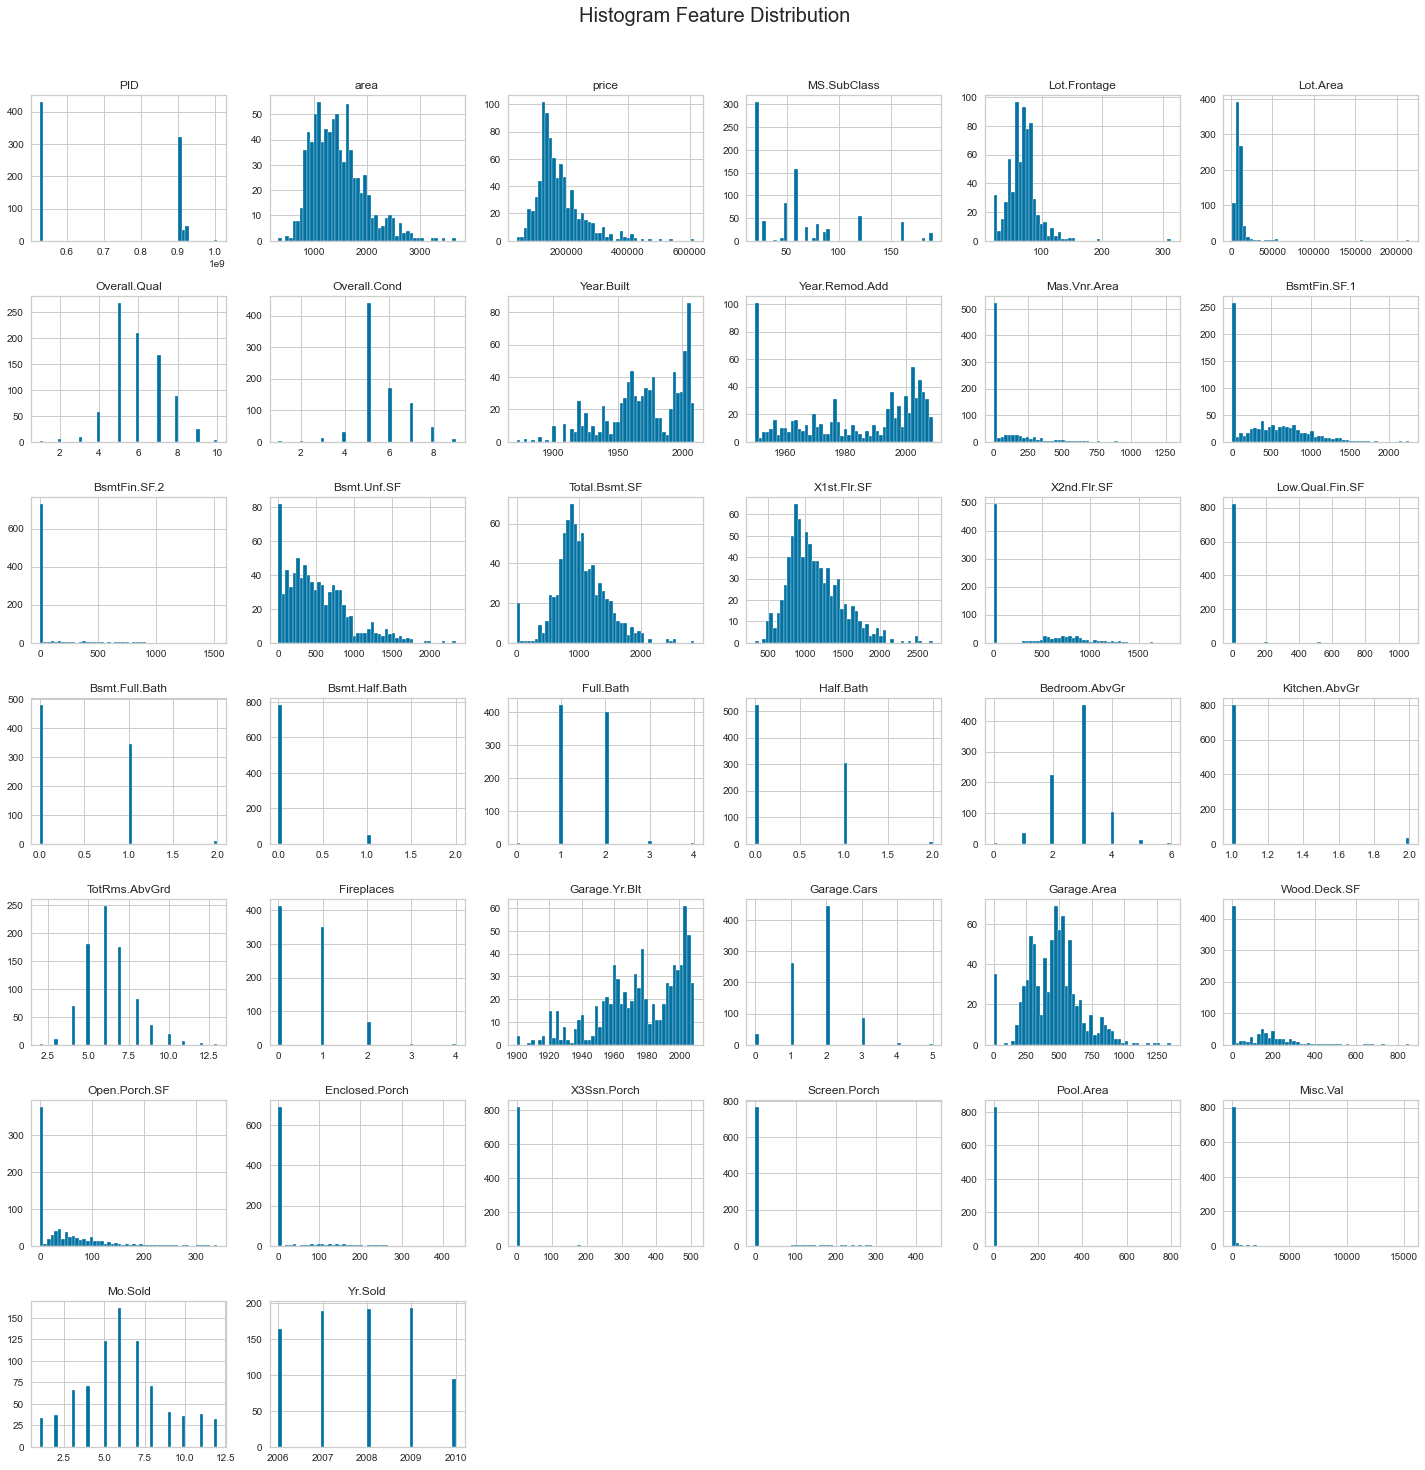

In [9]:
df2.hist(bins=50, figsize=(20,20))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

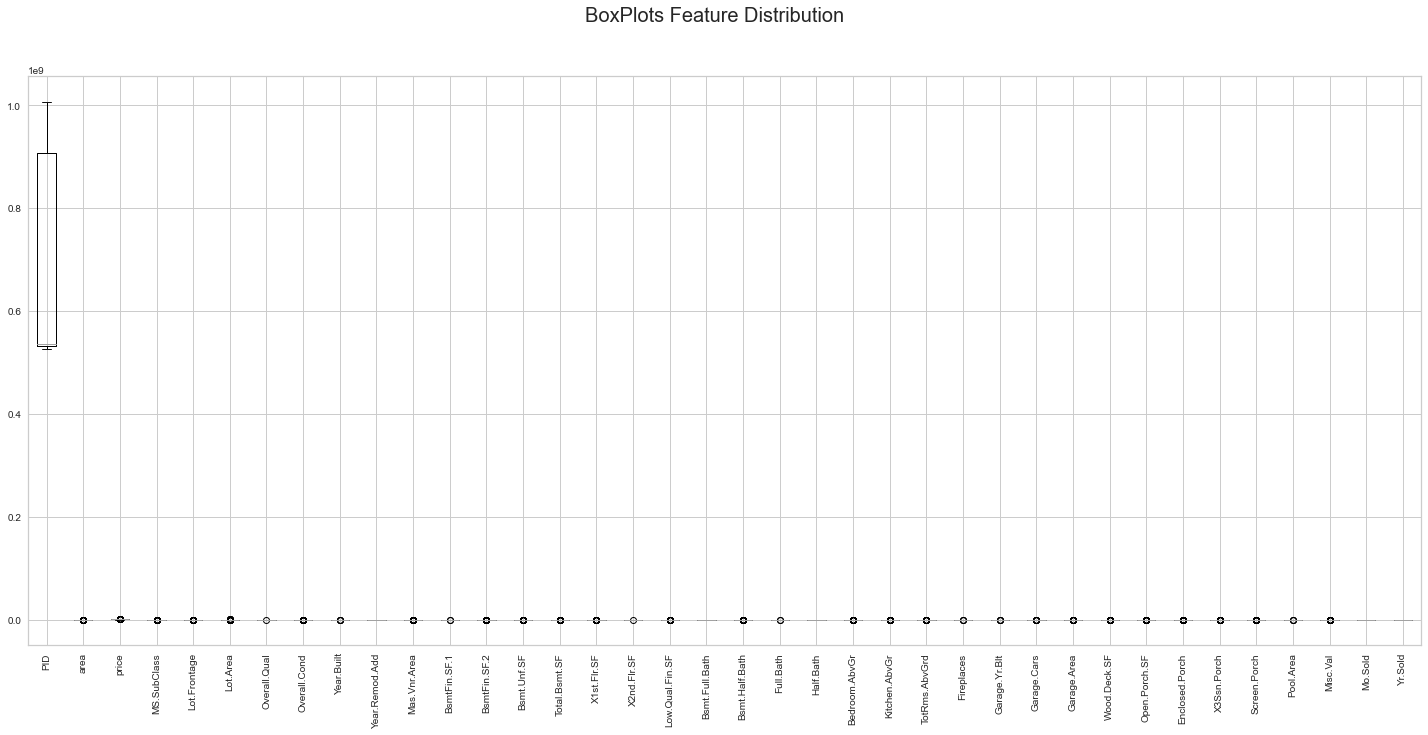

In [10]:
df2.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
df2.isnull().sum().sort_values(ascending=False).head(20)

Pool.QC           831
Misc.Feature      806
Alley             781
Fence             655
Fireplace.Qu      414
Lot.Frontage      156
Garage.Finish      36
Garage.Yr.Blt      36
Garage.Qual        36
Garage.Cond        36
Garage.Type        35
Bsmt.Exposure      21
Bsmt.Qual          20
BsmtFin.Type.2     20
Bsmt.Cond          20
BsmtFin.Type.1     20
Mas.Vnr.Type        4
Mas.Vnr.Area        4
Bedroom.AbvGr       0
Half.Bath           0
dtype: int64

In [12]:
df2.groupby(["Neighborhood"])["price"].median()

Neighborhood
Blmngtn    192000
Blueste    123900
BrDale     100500
BrkSide    125250
ClearCr    187500
CollgCr    195000
Crawfor    198000
Edwards    125400
Gilbert    184000
Greens     212625
GrnHill    280000
IDOTRR     103000
MeadowV     85750
Mitchel    160000
NAmes      140000
NPkVill    142100
NWAmes     190000
NoRidge    290000
NridgHt    305500
OldTown    120000
SWISU      129500
Sawyer     135000
SawyerW    181000
Somerst    220000
StoneBr    255500
Timber     232500
Veenker    217500
Name: price, dtype: int64

In [13]:
graph1 = pd.DataFrame(df2.groupby(["Neighborhood"])["price"].median())
graph1

,price
Neighborhood,
Blmngtn,192000
Blueste,123900
BrDale,100500
BrkSide,125250
ClearCr,187500
CollgCr,195000
Crawfor,198000
Edwards,125400
Gilbert,184000


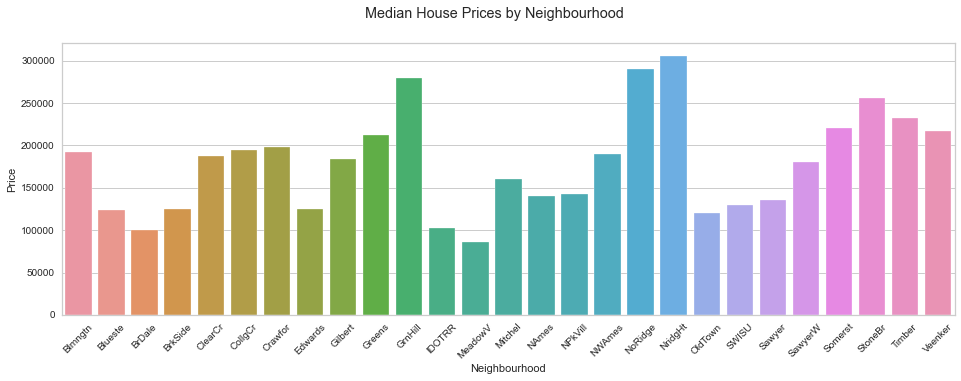

In [14]:
fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
fig.suptitle('Median House Prices by Neighbourhood')

sns.barplot(x=graph1.index, y=graph1.price, data=graph1)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price")
plt.show()

Certain neighbourhoods can fetch high prices as shown in bar graph above.

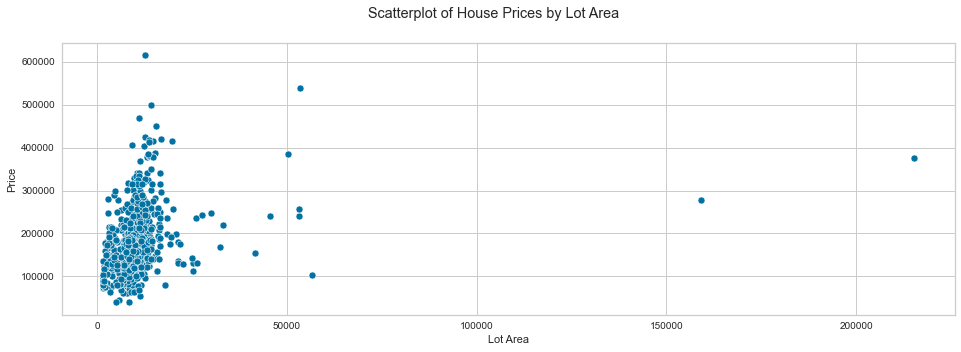

In [15]:
fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
fig.suptitle('Scatterplot of House Prices by Lot Area')

sns.scatterplot(x=df2["Lot.Area"], y=df2.price, data=df2, ax=ax)
#ax.tick_params('x', labelrotation=45)
ax.set_xlabel("Lot Area")
ax.set_ylabel("Price")

plt.show()

Most of Lot Area sizes less than 25000 square feet fetch higher prices.

In [16]:
df2["Age"] = 2021 - df2["Year.Built"]

In [17]:
df2.head()

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,Age
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,238.00,Unf,0.00,618.00,856.00,GasA,TA,Y,SBrkr,856,0,0,1.00,0.00,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.00,Unf,2.00,399.00,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,82
1,905476230,1049,139500,120,RL,42.00,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.00,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.00,ALQ,393.00,104.00,1049.00,GasA,TA,Y,SBrkr,1049,0,0,1.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.00,Fin,1.00,266.00,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,37
2,911128020,1001,124900,30,C (all),60.00,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.00,Gd,TA,BrkTil,TA,TA,No,ALQ,737.00,Unf,0.00,100.00,837.00,GasA,Ex,Y,SBrkr,1001,0,0,0.00,0.00,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.00,Unf,1.00,216.00,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,91
3,535377150,1039,114000,70,RL,80.00,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.00,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.00,Unf,0.00,405.00,405.00,GasA,Gd,Y,SBrkr,717,322,0,0.00,0.00,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.00,Unf,1.00,281.00,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121
4,534177230,1665,227000,60,RL,70.00,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,TA,No,GLQ,643.00,Unf,0.00,167.00,810.00,GasA,Ex,Y,SBrkr,810,855,0,1.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.00,Fin,2.00,528.00,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,20


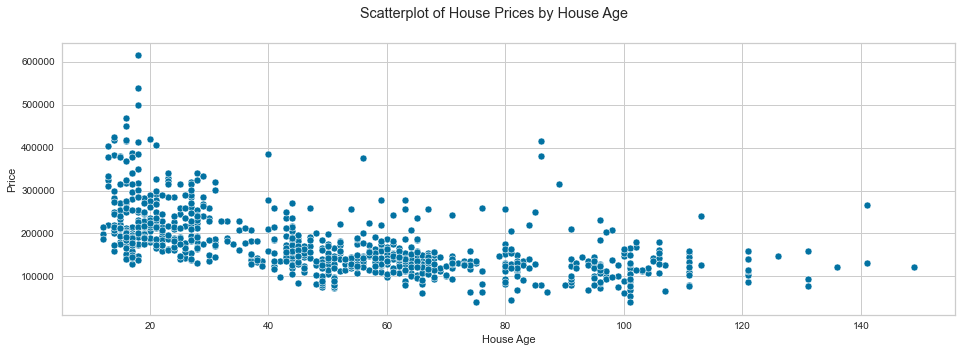

In [18]:
fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
fig.suptitle('Scatterplot of House Prices by House Age')

sns.scatterplot(x=df2["Age"], y=df2.price, data=df2, ax=ax)
#ax.tick_params('x', labelrotation=45)
ax.set_xlabel("House Age")
ax.set_ylabel("Price")

plt.show()

Using price cut off point at $400000, most houses preferred are not more than 40 years old.

## Part 2 - Development and assessment of an initial model, following a semi-guided process of analysis

### Section 2.1 An Initial Model

In building a model, it is often useful to start by creating a simple, intuitive initial model based on the results of the exploratory data analysis. (Note: The goal at this stage is **not** to identify the "best" possible model but rather to choose a reasonable and understandable starting point. Later you will expand and revise this model to create your final model.

Based on your EDA, select *at most* 10 predictor variables from “ames_train” and create a linear model for `price` (or a transformed version of price) using those variables. Provide the *R code* and the *summary output table* for your model, a *brief justification* for the variables you have chosen, and a *brief discussion* of the model results in context (focused on the variables that appear to be important predictors and how they relate to sales price).

### Correlation

In [19]:
df2.corr()

,PID,area,price,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,Age
PID,1.00,-0.12,-0.23,0.01,-0.13,0.05,-0.21,0.07,-0.30,-0.16,-0.18,-0.16,0.00,-0.01,-0.18,-0.16,0.00,0.01,-0.10,-0.01,-0.11,-0.17,0.00,0.08,-0.08,-0.13,-0.23,-0.18,-0.20,-0.06,-0.08,0.16,-0.06,-0.06,-0.05,-0.04,-0.06,-0.01,0.30
area,-0.12,1.00,0.75,0.08,0.33,0.23,0.59,-0.12,0.25,0.36,0.41,0.16,-0.06,0.28,0.43,0.54,0.69,0.05,0.07,-0.06,0.67,0.45,0.58,0.14,0.81,0.50,0.28,0.52,0.47,0.34,0.30,-0.01,-0.01,0.07,0.13,-0.03,0.05,0.01,-0.25
price,-0.23,0.75,1.00,-0.07,0.38,0.27,0.80,-0.12,0.56,0.53,0.53,0.47,-0.01,0.18,0.67,0.67,0.31,-0.06,0.33,-0.06,0.56,0.30,0.22,-0.09,0.53,0.52,0.53,0.65,0.62,0.43,0.33,-0.15,-0.01,0.10,0.09,-0.02,0.05,0.02,-0.56
MS.SubClass,0.01,0.08,-0.07,1.00,-0.41,-0.17,0.06,-0.13,0.09,0.06,-0.01,-0.08,-0.07,-0.10,-0.22,-0.23,0.29,-0.01,-0.03,-0.03,0.14,0.17,-0.06,0.27,0.00,0.03,0.13,0.03,-0.04,-0.04,-0.02,-0.07,-0.05,-0.03,0.01,-0.05,-0.00,-0.04,-0.09
Lot.Frontage,-0.13,0.33,0.38,-0.41,1.00,0.40,0.21,-0.04,0.12,0.09,0.25,0.18,0.07,0.11,0.32,0.46,-0.02,-0.04,0.16,-0.03,0.16,0.02,0.30,0.00,0.36,0.23,0.07,0.31,0.35,0.14,0.08,-0.05,0.04,0.09,0.06,0.02,0.01,0.00,-0.12
Lot.Area,0.05,0.23,0.27,-0.17,0.40,1.00,0.07,-0.04,-0.01,0.03,0.09,0.16,0.11,0.01,0.23,0.28,0.03,-0.00,0.12,0.06,0.12,-0.01,0.15,-0.01,0.21,0.22,-0.03,0.16,0.16,0.10,0.05,-0.02,0.01,0.04,0.02,0.03,-0.00,-0.01,0.01
Overall.Qual,-0.21,0.59,0.80,0.06,0.21,0.07,1.00,-0.12,0.57,0.54,0.41,0.26,-0.06,0.27,0.52,0.47,0.30,-0.09,0.19,-0.04,0.53,0.29,0.14,-0.11,0.41,0.43,0.56,0.58,0.51,0.31,0.30,-0.16,-0.00,0.06,0.05,-0.01,0.05,0.01,-0.57
Overall.Cond,0.07,-0.12,-0.12,-0.13,-0.04,-0.04,-0.12,1.00,-0.38,0.05,-0.14,-0.08,-0.00,-0.12,-0.20,-0.16,0.00,-0.02,-0.07,0.07,-0.24,-0.09,0.01,-0.08,-0.05,-0.08,-0.35,-0.22,-0.20,0.03,-0.11,0.08,0.02,0.05,-0.06,0.08,0.05,-0.03,0.38
Year.Built,-0.30,0.25,0.56,0.09,0.12,-0.01,0.57,-0.38,1.00,0.57,0.32,0.31,0.01,0.07,0.41,0.30,0.05,-0.12,0.24,-0.06,0.47,0.28,-0.01,-0.14,0.11,0.21,0.85,0.53,0.47,0.28,0.23,-0.40,-0.01,-0.04,0.01,-0.03,0.00,0.03,-1.00
Year.Remod.Add,-0.16,0.36,0.53,0.06,0.09,0.03,0.54,0.05,0.57,1.00,0.22,0.14,-0.06,0.15,0.27,0.26,0.21,-0.08,0.12,-0.07,0.46,0.25,0.06,-0.15,0.22,0.15,0.60,0.41,0.34,0.27,0.20,-0.24,0.01,-0.04,-0.01,0.02,0.03,0.07,-0.57


In [20]:
df2.corr()["price"].sort_values()

Age               -0.56
PID               -0.23
Enclosed.Porch    -0.15
Overall.Cond      -0.12
Kitchen.AbvGr     -0.09
MS.SubClass       -0.07
Bsmt.Half.Bath    -0.06
Low.Qual.Fin.SF   -0.06
Misc.Val          -0.02
BsmtFin.SF.2      -0.01
X3Ssn.Porch       -0.01
Yr.Sold            0.02
Mo.Sold            0.05
Pool.Area          0.09
Screen.Porch       0.10
Bsmt.Unf.SF        0.18
Bedroom.AbvGr      0.22
Lot.Area           0.27
Half.Bath          0.30
X2nd.Flr.SF        0.31
Open.Porch.SF      0.33
Bsmt.Full.Bath     0.33
Lot.Frontage       0.38
Wood.Deck.SF       0.43
BsmtFin.SF.1       0.47
Fireplaces         0.52
Mas.Vnr.Area       0.53
Garage.Yr.Blt      0.53
TotRms.AbvGrd      0.53
Year.Remod.Add     0.53
Year.Built         0.56
Full.Bath          0.56
Garage.Area        0.62
Garage.Cars        0.65
X1st.Flr.SF        0.67
Total.Bsmt.SF      0.67
area               0.75
Overall.Qual       0.80
price              1.00
Name: price, dtype: float64

In [21]:
df2.columns

Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
       'Wo

### Select Age, Overall.Qual, Lot.Area, Total.Bsmt.SF, X1st.Flr.SF, 
### Garage.Cars, Garage.Area, Full.Bath, TotRms.AbvGrd, Fireplaces, price

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Age |House Age	|
|Overall.Qual |	Rates the overall material and finish of the house|
|Lot.Area | Lot size in square feet	|
|Total.Bsmt.SF | Total square feet of basement area	|
|X1st.Flr.SF |	First Floor square feet |
|Garage.Cars | Size of garage in car capacity	|
|Garage.Area | Size of garage in square feet	|
|Full.Bath | Full bathrooms above grade	|
|TotRms.AbvGrd | Total rooms above grade (does not include bathrooms)	|
|Fireplaces | Number of fireplaces	|
| price |Sale price $$	|

In [22]:
df3 = df2[['Age','Lot.Area','Total.Bsmt.SF','X1st.Flr.SF','Garage.Cars','Garage.Area',
           'TotRms.AbvGrd','Full.Bath','Fireplaces','Overall.Qual','price']]

In [23]:
df3

,Age,Lot.Area,Total.Bsmt.SF,X1st.Flr.SF,Garage.Cars,Garage.Area,TotRms.AbvGrd,Full.Bath,Fireplaces,Overall.Qual,price
0,82,7890,856.00,856,2.00,399.00,4,1,1,6,126000
1,37,4235,1049.00,1049,1.00,266.00,5,2,0,5,139500
2,91,6060,837.00,1001,1.00,216.00,5,1,0,5,124900
3,121,8146,405.00,717,1.00,281.00,6,1,0,4,114000
4,20,8400,810.00,810,2.00,528.00,6,2,0,8,227000
...,...,...,...,...,...,...,...,...,...,...,...
993,61,14585,1144.00,1429,2.00,572.00,7,1,2,6,181900
994,25,11787,1379.00,1383,3.00,834.00,8,2,1,7,315750
995,17,4426,848.00,848,2.00,420.00,3,1,0,6,145000
998,52,9364,663.00,663,1.00,299.00,7,1,0,6,158000


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            834 non-null    int64  
 1   Lot.Area       834 non-null    int64  
 2   Total.Bsmt.SF  834 non-null    float64
 3   X1st.Flr.SF    834 non-null    int64  
 4   Garage.Cars    834 non-null    float64
 5   Garage.Area    834 non-null    float64
 6   TotRms.AbvGrd  834 non-null    int64  
 7   Full.Bath      834 non-null    int64  
 8   Fireplaces     834 non-null    int64  
 9   Overall.Qual   834 non-null    int64  
 10  price          834 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 78.2 KB


In [25]:
df3.columns

Index(['Age', 'Lot.Area', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'Garage.Cars', 'Garage.Area', 'TotRms.AbvGrd', 'Full.Bath', 'Fireplaces', 'Overall.Qual', 'price'], dtype='object')

In [26]:
y = df3[['price']]
X = df3[['Age', 'Lot.Area', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'Garage.Cars', 'Garage.Area', 
        'TotRms.AbvGrd', 'Full.Bath', 'Fireplaces', 'Overall.Qual']]

In [27]:
X = sm.add_constant(X)

In [28]:
model = sm.OLS(y,X).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     372.7
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          1.41e-297
Time:                        04:36:32   Log-Likelihood:                -9800.8
No. Observations:                 834   AIC:                         1.962e+04
Df Residuals:                     823   BIC:                         1.968e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.776e+04   8146.560     -9.546      0.000   -9.38e+04   -6.18e+04
Age            -303.8242     51.643     -5.883      0.000    -405.192    -202.456
Lot.Area          0.6996      0.110      6.335      0.000       0.483       0.916
Total.Bsmt.SF    27.7163      4.783      5.795      0.000      18.328      37.105
X1st.Flr.SF      22.3023      5.464      4.082      0.000      11.577      33.027
Garage.Cars     713.9201   3531.180      0.202      0.840   -6217.258    7645.099
Garage.Area      43.1257     11.960      3.606      0.000      19.649      66.602
TotRms.AbvGrd  7225.6529    939.084      7.694      0.000    5382.371    9068.935
Full.Bath      1590.2696   2812.940      0.565      0.572   -3931.112    7111.651
Fireplaces     1.145e+04   1920.599      5.960      0.000    7676.086    1.52e+04
Overall.Qual   2.195e+04   1207.344     18.184      0.000    1.96e+04    2.43e+04
==============================================================================
Omnibus:                      279.372   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1840.513
Skew:                           1.355   Prob(JB):                         0.00
Kurtosis:                       9.754   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the model summary results, the R2 score is quite high around 0.82.

I used to calculate the correlations and decide on important variables like age, bathrooms, quality, fireplaces, garage and area size to determine house prices. This may not mean to imply causation.

Only Garage Cars and Full Bathroom p-values is more than 0.05, means I can drop these later.

### Create and save processed dataset

In [30]:
#df3.to_csv("train.csv",index=False)

### Section 2.2 Model Selection

Now either using `BAS` another stepwise selection procedure choose the "best" model you can, using your initial model as your starting point. Try at least two different model selection methods and compare their results. Do they both arrive at the same model or do they disagree? What do you think this means?

### Stepwise Method

In [31]:
## getting column names
x_columns = ['Age', 'Lot.Area', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'Garage.Cars', 'Garage.Area', 
        'TotRms.AbvGrd', 'Full.Bath', 'Fireplaces', 'Overall.Qual']
y = df3["price"]

In [32]:
def get_stats():
    x = df3[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
    
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              2725.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                        0.00
Time:                        04:36:32   Log-Likelihood:                         -9844.5
No. Observations:                 834   AIC:                                  1.971e+04
Df Residuals:                     824   BIC:                                  1.976e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [33]:
x_columns.remove("Full.Bath")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              3030.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                        0.00
Time:                        04:36:32   Log-Likelihood:                         -9844.8
No. Observations:                 834   AIC:                                  1.971e+04
Df Residuals:                     825   BIC:                                  1.975e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [34]:
x_columns.remove("Garage.Cars")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              3413.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                        0.00
Time:                        04:36:32   Log-Likelihood:                         -9844.8
No. Observations:                 834   AIC:                                  1.971e+04
Df Residuals:                     826   BIC:                                  1.974e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Univariate linear regression tests returning F-statistic and p-values

In [35]:
F, p = sklearn.feature_selection.f_regression(X,y)

In [36]:
#F-Scores
F

array([          nan,  370.94601078,   66.66094109,  691.8378471 ,
        668.99560908,  625.03218874,  528.95269607,  330.47155264,
        379.31849357,  309.15046615, 1429.06661093])

In [37]:
#P-values
p

array([nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

More or less arrive at the same results.

### Section 2.3 Initial Model Residuals

One way to assess the performance of a model is to examine the model's residuals. In the space below, create a residual plot for your preferred model from above and use it to assess whether your model appears to fit the data well. Comment on any interesting structure in the residual plot (trend, outliers, etc.) and briefly discuss potential implications it may have for your model and inference / prediction you might produce.

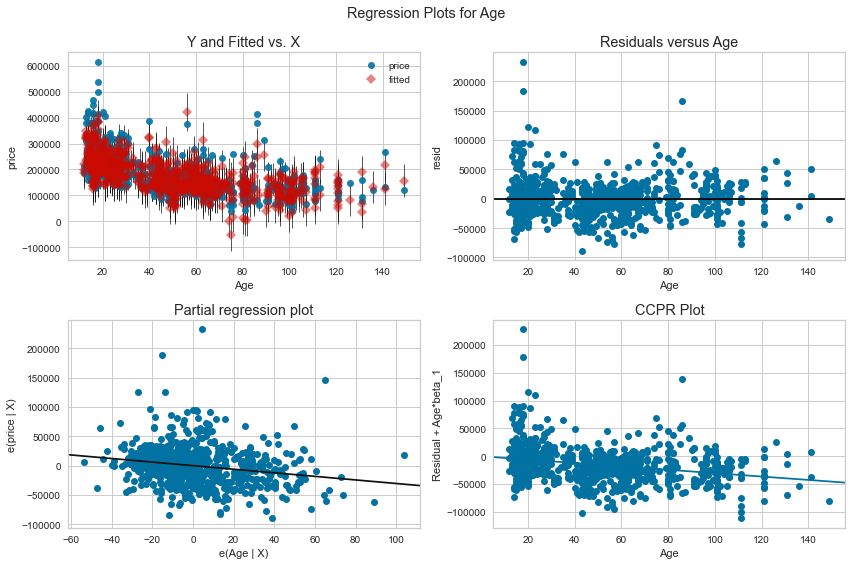

In [38]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Age', fig=fig)

<Figure size 864x576 with 0 Axes>

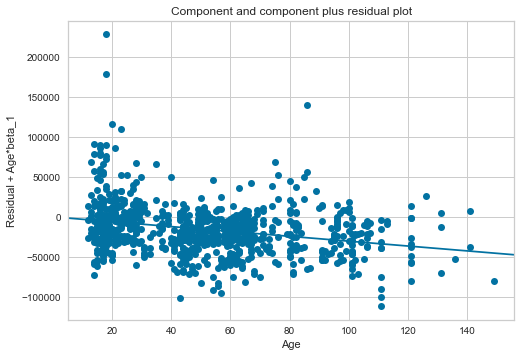

In [39]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(model, "Age")
fig.show()

### Section 2.4 Initial Model RMSE

You can calculate it directly based on the model output. Be specific about the units of your RMSE (depending on whether you transformed your response variable). The value you report will be more meaningful if it is in the original units (dollars).

In [40]:
df3.head()

,Age,Lot.Area,Total.Bsmt.SF,X1st.Flr.SF,Garage.Cars,Garage.Area,TotRms.AbvGrd,Full.Bath,Fireplaces,Overall.Qual,price
0,82,7890,856.00,856,2.00,399.00,4,1,1,6,126000
1,37,4235,1049.00,1049,1.00,266.00,5,2,0,5,139500
2,91,6060,837.00,1001,1.00,216.00,5,1,0,5,124900
3,121,8146,405.00,717,1.00,281.00,6,1,0,4,114000
4,20,8400,810.00,810,2.00,528.00,6,2,0,8,227000


### Train Test Split

In [41]:
X = df3.iloc[:,0:10]
y = df3.iloc[:,10]

In [42]:
df3.shape

(834, 11)

In [43]:
X.values, y.values

(array([[  82., 7890.,  856., ...,    1.,    1.,    6.],
        [  37., 4235., 1049., ...,    2.,    0.,    5.],
        [  91., 6060.,  837., ...,    1.,    0.,    5.],
        ...,
        [  17., 4426.,  848., ...,    1.,    0.,    6.],
        [  52., 9364.,  663., ...,    1.,    0.,    6.],
        [  43., 7540.,  888., ...,    1.,    1.,    6.]]),
 array([126000, 139500, 124900, 114000, 227000, 198500,  93000, 137500,
        140000, 219500, 136000,  80000, 159000, 214000, 163000,  67000,
        205000, 131250, 181000,  98000, 265979, 105500, 201000, 177500,
        200000, 450000,  91300, 199500, 207000, 155000, 220000, 196000,
         61500, 195000, 129250, 291000, 134000, 186000, 133500, 148000,
        215000, 131000, 109500, 110000, 179600, 140000, 151500, 341000,
        235000,  72000, 154000, 128200, 615000, 158000, 254000, 169000,
        284500, 184500, 214000, 282922, 144000,  67500, 148000, 159000,
        120000, 134900, 185000, 132500, 160500, 165000, 100000, 189

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((667, 10), (167, 10), (667,), (167,))

In [46]:
reg_model1 = LinearRegression()

In [47]:
reg_model1.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred1 = reg_model1.predict(X_test)

In [49]:
y_pred1

array([264457.58542294, 229395.12791844, 192565.0724753 , 261240.65364319,
       147587.52210411, 254735.93403986, 102086.05099565, 190107.09316621,
       130102.47435603, 161791.22910954, 153084.25595132,    200.513668  ,
       343840.07428766,  86823.20304501, 132298.85766284, 234000.71005306,
       127511.9420955 , 163403.01114282, 128723.01220164, 104154.73276416,
       143102.84456543, 220935.81627222, 177042.77230611, 316858.75840187,
       199806.66690538, 142478.00483833, 229957.75708756, 167869.73897294,
        66180.65551477, 209786.53183593, 241079.31060159, 133149.55317362,
       196137.02568594, 111675.54387782,  39276.03071735, 108885.02190634,
       148322.99374734, 194059.15594586, 177497.86015057, 246572.30286318,
       200935.11776544, 189984.46796206, 139027.46164164,  96160.98258359,
       168705.38894656, 214430.62137589, 138278.50144587, 139126.09391357,
       112693.92282627, 184269.98793695, 247061.94350199, 187594.05015803,
       115000.77666304, 1

In [50]:
mse = mean_squared_error(y_test,y_pred1)
mse

968402818.4827359

In [51]:
rmse = np.sqrt(mse)
rmse

31119.17123708046

In [52]:
r2score = r2_score(y_test,y_pred1)
r2score

0.8112393839891935

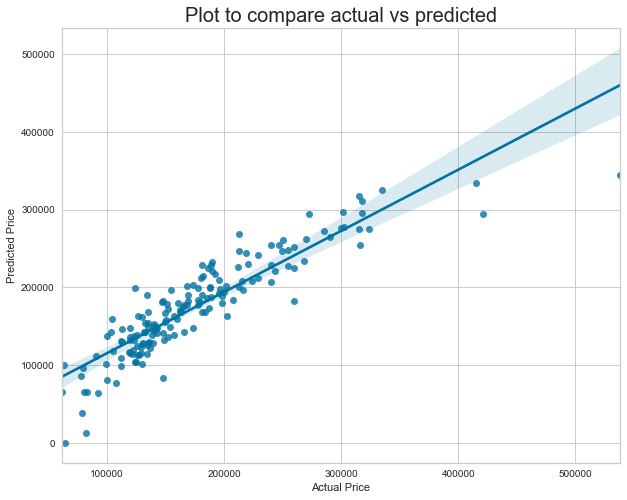

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred1, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")
plt.show()

Initial Model RMSE is $31119.17.

### Section 2.5 Overfitting

The process of building a model generally involves starting with an initial model (as you have done above), identifying its shortcomings, and adapting the model accordingly. This process may be repeated several times until the model fits the data reasonably well. However, the model may do well on training data but perform poorly out-of-sample (meaning, on a dataset other than the original training data) because the model is overly-tuned to specifically fit the training data. This is called “overfitting.” To determine whether overfitting is occurring on a model, compare the performance of a model on both in-sample and out-of-sample data sets. To look at performance of your initial model on out-of-sample data, you will use the data set `ames_test`.

Use your model from above to generate predictions for the housing prices in the test data set.  Are the predictions significantly more accurate (compared to the actual sales prices) for the training data than the test data?  Why or why not? Briefly explain how you determined that (what steps or processes did you use)?

In [54]:
testdf = pd.read_csv("test.csv")

In [55]:
testdf.head()

,Age,Lot.Area,Total.Bsmt.SF,X1st.Flr.SF,Garage.Cars,Garage.Area,TotRms.AbvGrd,Full.Bath,Fireplaces,Overall.Qual,price
0,17,10386,2000,2000,3,888,8,2,0,8,305900
1,64,14442,1477,1839,2,416,7,2,2,6,257500
2,69,11556,720,882,1,240,4,1,0,5,116000
3,53,11700,912,1152,2,412,7,1,0,6,143450
4,16,7313,1561,1561,2,556,6,2,1,9,277500


### Train Test Split

In [56]:
X = testdf.iloc[:,0:10]
y = testdf.iloc[:,10]

In [57]:
testdf.shape

(817, 11)

In [58]:
X.values, y.values

(array([[   17, 10386,  2000, ...,     2,     0,     8],
        [   64, 14442,  1477, ...,     2,     2,     6],
        [   69, 11556,   720, ...,     1,     0,     5],
        ...,
        [   16, 12328,  1149, ...,     3,     1,     8],
        [   51, 10400,  1304, ...,     2,     1,     7],
        [   81, 12400,   901, ...,     1,     1,     5]], dtype=int64),
 array([305900, 257500, 116000, 143450, 277500, 200000, 105000, 755000,
        204000, 255000, 156500,  86000, 240900, 268000, 244000, 155000,
        144500, 122500, 141000, 131000, 230000, 320000, 185900, 130000,
        188000, 127500, 188500, 200100, 148500, 137000, 157000,  82500,
        168000, 108000, 177625, 235000, 155000, 108000, 155000, 175000,
        362500, 184900, 135000, 150000, 195000, 210000, 133000, 286500,
        119900, 190000, 137000, 115000, 113500, 167500, 335000, 140000,
        176000, 125000, 105000, 130250, 210900, 122000, 375000, 275000,
         64500, 144000, 171500, 108500, 244400, 196000

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((653, 10), (164, 10), (653,), (164,))

In [61]:
reg_model2 = LinearRegression()

In [62]:
reg_model2.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred2 = reg_model2.predict(X_test)

In [64]:
y_pred2

array([169184.09122778, 166944.28485546, 112408.2260573 , 145475.95121597,
       176299.05187298, 226458.87651608, 297317.8801584 , 183143.10863412,
       287011.1352525 , 258219.34196312, 250643.64013437, 231730.55799411,
       183298.5091593 , 221193.58114253, 140645.54522815, 173320.51364818,
       224846.42245719, 125559.81714897, 188107.97383976, 225768.37958257,
       255136.82484138, 232769.67384871, 159964.42559422, 133776.40038166,
       164452.11024763,  49776.56524864, 317069.88250415,  87819.08694905,
       226775.0734044 , 183759.13953059, 136504.70384258, 229334.37749302,
       134953.58242595, 230120.44226249, 197116.44299845, 138032.7694899 ,
       188747.63096681, 217184.94927238, 151728.26631435, 216114.81177897,
       150186.86968356, 130809.69411639, 256036.93849535, 150477.37130426,
       107872.6471539 , 116892.44988204, 221588.73368258, 209775.39771133,
        97237.94192887, 197280.8410987 , 123237.07906325, 230428.58089556,
       204001.01100893, 1

In [65]:
mse = mean_squared_error(y_test,y_pred2)
mse

1734876811.8297596

In [66]:
rmse = np.sqrt(mse)
rmse

41651.852441755334

In [67]:
r2score = r2_score(y_test,y_pred2)
r2score

0.5271584676345228

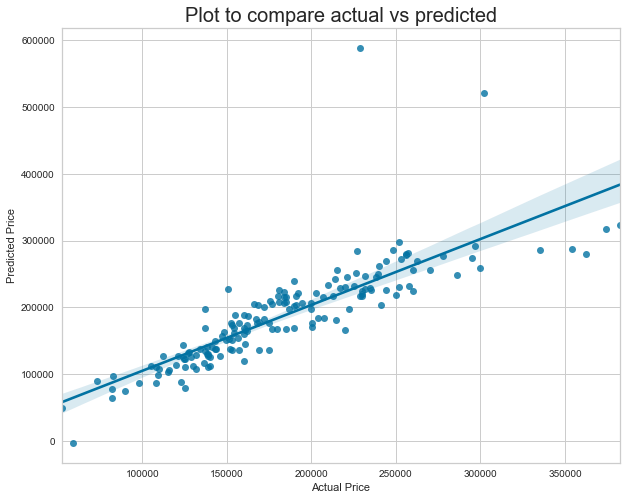

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred2, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")
plt.show()

The train data has much better prediction than test data. The difference is $10000 for RMSE.

**Note to the learner:** If in real-life practice this out-of-sample analysis shows evidence that the training data fits your model a lot better than the test data, it is probably a good idea to go back and revise the model (usually by simplifying the model) to reduce this overfitting. For simplicity, we do not ask you to do this on the assignment, however.

## Part 3 Development of a Final Model

Now that you have developed an initial model to use as a baseline, create a final model with *at most* 20 variables to predict housing prices in Ames, IA, selecting from the full array of variables in the dataset and using any of the tools that we introduced in this specialization.  

Carefully document the process that you used to come up with your final model, so that you can answer the questions below.

In [69]:
df = pd.read_csv("train.csv")

In [70]:
df.head()

,Age,Lot.Area,Total.Bsmt.SF,X1st.Flr.SF,Garage.Cars,Garage.Area,TotRms.AbvGrd,Full.Bath,Fireplaces,Overall.Qual,price
0,82,7890,856.00,856,2.00,399.00,4,1,1,6,126000
1,37,4235,1049.00,1049,1.00,266.00,5,2,0,5,139500
2,91,6060,837.00,1001,1.00,216.00,5,1,0,5,124900
3,121,8146,405.00,717,1.00,281.00,6,1,0,4,114000
4,20,8400,810.00,810,2.00,528.00,6,2,0,8,227000


In [71]:
# Drop 2 variables: Garage.Cars and Full.Bath

df.drop(['Garage.Cars','Full.Bath'], axis=1, inplace=True)

In [72]:
df.head()

,Age,Lot.Area,Total.Bsmt.SF,X1st.Flr.SF,Garage.Area,TotRms.AbvGrd,Fireplaces,Overall.Qual,price
0,82,7890,856.00,856,399.00,4,1,6,126000
1,37,4235,1049.00,1049,266.00,5,0,5,139500
2,91,6060,837.00,1001,216.00,5,0,5,124900
3,121,8146,405.00,717,281.00,6,0,4,114000
4,20,8400,810.00,810,528.00,6,0,8,227000


In [73]:
df.shape

(834, 9)

In [74]:
y = df[['price']]
X = df[['Age', 'Lot.Area', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'Garage.Area', 
        'TotRms.AbvGrd', 'Fireplaces', 'Overall.Qual']]

In [75]:
X = sm.add_constant(X)

In [76]:
final_model = sm.OLS(y,X).fit()

In [77]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     466.7
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          3.70e-300
Time:                        04:36:34   Log-Likelihood:                -9801.0
No. Observations:                 834   AIC:                         1.962e+04
Df Residuals:                     825   BIC:                         1.966e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.706e+04   8059.396     -9.562      0.000   -9.29e+04   -6.12e+04
Age            -315.5641     48.231     -6.543      0.000    -410.234    -220.894
Lot.Area          0.7021      0.110      6.368      0.000       0.486       0.918
Total.Bsmt.SF    27.5682      4.771      5.778      0.000      18.204      36.933
X1st.Flr.SF      22.4447      5.441      4.125      0.000      11.764      33.125
Garage.Area      45.0714      6.724      6.704      0.000      31.874      58.269
TotRms.AbvGrd  7489.4686    838.262      8.935      0.000    5844.092    9134.845
Fireplaces     1.144e+04   1916.586      5.970      0.000    7680.350    1.52e+04
Overall.Qual   2.211e+04   1177.572     18.776      0.000    1.98e+04    2.44e+04
==============================================================================
Omnibus:                      277.486   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1798.414
Skew:                           1.350   Prob(JB):                         0.00
Kurtosis:                       9.668   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Section 3.2 Transformation

Did you decide to transform any variables?  Why or why not? Explain in a few sentences.

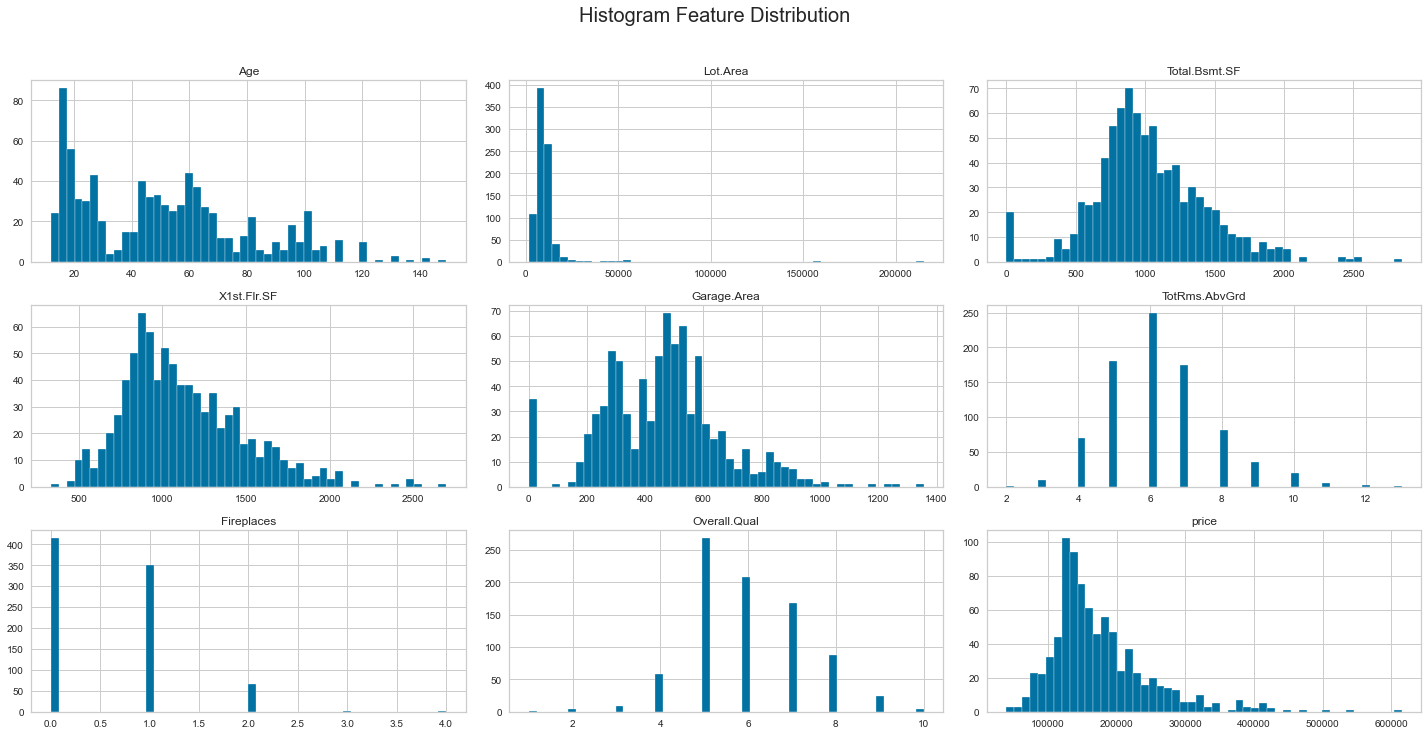

In [78]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

I decided not to transform any variables as I want to test the dataset with different machine learning models to find lowest RMSE. I will standardize the whole independant variables to ensure all are on same level.

### Section 3.3 Variable Interaction

Did you decide to include any variable interactions? Why or why not? Explain in a few sentences.

I decided not to include variable interactions to make sure the model is simple to understand.

### Section 3.4 Variable Selection

I used StatsModel library to check for p-values of each variable. By removing the insignificant ones, the model will be made simpler and faster to train.

### Section 3.5 Model Testing

How did testing the model on out-of-sample data affect whether or how you changed your model? Explain in a few sentences.

Remove insigificant variables.

## Part 4 Final Model Assessment

### Section 4.1 Final Model Residual

For your final model, create and briefly interpret an informative plot of the residuals.

In [79]:
df.shape

(834, 9)

In [80]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [81]:
X.values, y.values

(array([[  82., 7890.,  856., ...,    4.,    1.,    6.],
        [  37., 4235., 1049., ...,    5.,    0.,    5.],
        [  91., 6060.,  837., ...,    5.,    0.,    5.],
        ...,
        [  17., 4426.,  848., ...,    3.,    0.,    6.],
        [  52., 9364.,  663., ...,    7.,    0.,    6.],
        [  43., 7540.,  888., ...,    5.,    1.,    6.]]),
 array([126000, 139500, 124900, 114000, 227000, 198500,  93000, 137500,
        140000, 219500, 136000,  80000, 159000, 214000, 163000,  67000,
        205000, 131250, 181000,  98000, 265979, 105500, 201000, 177500,
        200000, 450000,  91300, 199500, 207000, 155000, 220000, 196000,
         61500, 195000, 129250, 291000, 134000, 186000, 133500, 148000,
        215000, 131000, 109500, 110000, 179600, 140000, 151500, 341000,
        235000,  72000, 154000, 128200, 615000, 158000, 254000, 169000,
        284500, 184500, 214000, 282922, 144000,  67500, 148000, 159000,
        120000, 134900, 185000, 132500, 160500, 165000, 100000, 189

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((667, 8), (167, 8), (667,), (167,))

In [84]:
X_train

,Age,Lot.Area,Total.Bsmt.SF,X1st.Flr.SF,Garage.Area,TotRms.AbvGrd,Fireplaces,Overall.Qual
753,16,11447,1964.00,1964,892.00,7,1,8
504,15,14892,1746.00,1746,758.00,7,2,9
780,60,8100,864.00,864,420.00,5,1,5
769,14,3684,1373.00,1555,660.00,7,1,7
434,63,13825,533.00,1021,300.00,6,0,5
...,...,...,...,...,...,...,...,...
763,57,9350,720.00,720,480.00,7,1,5
192,76,3500,370.00,442,0.00,4,0,3
629,82,7800,793.00,793,410.00,5,1,5
559,35,8239,0.00,1295,312.00,5,0,7


In [85]:
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)

In [87]:
X_test_scaled = scaler.transform(X_test)

In [88]:
X_train_scaled

array([[-1.21460205,  0.11350055,  2.3373356 , ...,  0.49733355,
         0.59671862,  1.48663881],
       [-1.24920122,  0.42782096,  1.79619186, ...,  0.49733355,
         2.09300177,  2.22940143],
       [ 0.30776143, -0.19187837, -0.39320621, ..., -0.79845348,
         0.59671862, -0.74164903],
       ...,
       [ 1.06894318, -0.21925025, -0.56945027, ..., -0.79845348,
         0.59671862, -0.74164903],
       [-0.55721782, -0.17919607, -2.53792268, ..., -0.79845348,
        -0.89956454,  0.7438762 ],
       [ 0.16936475,  0.2599401 ,  0.00396351, ..., -0.79845348,
        -0.89956454, -0.74164903]])

In [89]:
X_test_scaled

array([[-1.00700703,  0.1424235 ,  0.32169928, ...,  1.79312058,
         0.59671862,  1.48663881],
       [-0.93780869, -0.07554789,  0.04368048, ...,  1.79312058,
         0.59671862,  0.7438762 ],
       [-1.00700703, -0.08494557, -0.44781704, ...,  0.49733355,
        -0.89956454,  0.7438762 ],
       ...,
       [-0.93780869, -0.17928731, -0.51980405, ..., -0.15055996,
         0.59671862,  0.00111359],
       [ 0.3423606 , -0.10063878,  0.3018408 , ..., -0.15055996,
         0.59671862, -0.74164903],
       [ 0.23856309, -0.17819244,  0.07595052, ..., -0.15055996,
        -0.89956454, -0.74164903]])

## Model Training

In [90]:
final_model = ExtraTreesRegressor()

In [91]:
final_model.fit(X_train_scaled,y_train)

ExtraTreesRegressor()

In [92]:
y_pred2 = final_model.predict(X_test_scaled)

In [93]:
y_pred2

array([281655.  , 243571.5 , 194136.5 , 225257.8 , 124897.88, 251151.72,
       114539.  , 202086.29, 135118.  , 144344.38, 148000.  ,  63020.14,
       327827.5 , 101829.5 , 135694.  , 244227.5 , 130694.5 , 155398.13,
       134960.5 , 118122.5 , 134232.2 , 205275.  , 173095.  , 374329.51,
       198314.5 , 141353.  , 195982.  , 149488.4 ,  97600.5 , 196407.43,
       243051.  , 126128.  , 188696.57, 107051.5 ,  85296.5 , 118824.  ,
       164078.5 , 199902.1 , 166688.  , 221880.  , 165440.  , 202881.4 ,
       150037.5 , 106679.5 , 188718.25, 189945.  , 134656.6 , 149186.8 ,
       127480.5 , 177962.  , 218993.  , 180209.  , 130124.  , 130102.5 ,
       162990.5 , 149022.5 , 282984.75, 201712.4 , 143018.25, 172532.  ,
        82951.  , 319265.  , 309517.5 , 110990.08, 393442.5 , 151593.66,
       214470.51, 117794.  ,  97600.5 , 367817.5 , 146218.  , 133850.  ,
       183536.5 , 212701.  , 172675.  , 126196.25, 183371.79, 143827.38,
       215312.  , 151882.6 , 157383.5 , 103346.5 , 

In [94]:
mse = mean_squared_error(y_test,y_pred2)
mse

754529532.9880952

In [95]:
rmse = np.sqrt(mse)
rmse

27468.700970160477

In [96]:
r2score = r2_score(y_test,y_pred2)
r2score

0.8529274629039939

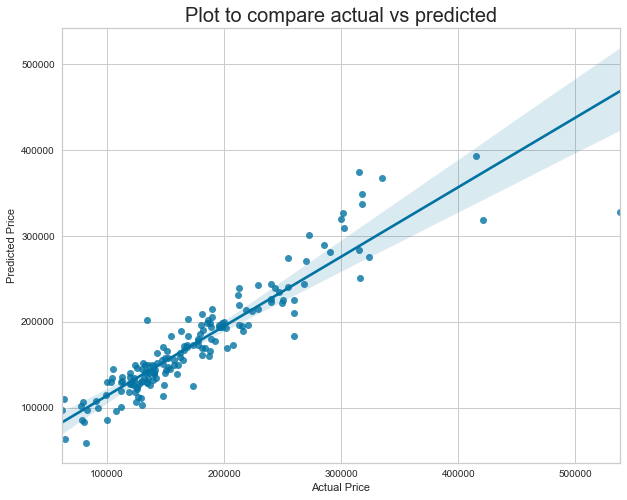

In [97]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred2, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")
plt.show()

In [98]:
residual = (y_test - y_pred2)

In [99]:
residual.head()

713    8345.00
686   -3571.50
31     1863.50
674   24742.20
412   48102.12
Name: price, dtype: float64

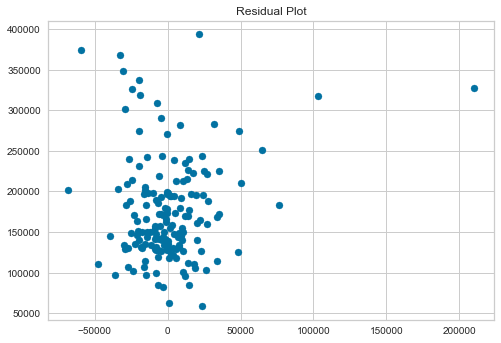

In [100]:
plt.scatter(residual,y_pred2)
plt.title("Residual Plot")
plt.show()

Residuals are between -50000 to 50000 range mostly.

### Section 4.2 Final Model RMSE

For your final model, calculate and briefly comment on the RMSE.

In [101]:
rmse = np.sqrt(mse)
rmse

27468.700970160477

By using ExtraTreesClassifier, it is much better than Linear Regression model to minimize the errors.

### Section 4.3 Final Model Evaluation

What are some strengths and weaknesses of your model?

Extra Trees is an ensemble machine learning algorithm that combines the predictions from many decision trees.

It is related to the widely used random forest algorithm. It can often achieve as-good or better performance than the random forest algorithm, although it uses a simpler algorithm to construct the decision trees used as members of the ensemble.

### Section 4.4 Final Model Validation

Testing your final model on a separate, validation data set is a great way to determine how your model will perform in real-life practice.

You will use the “ames_validation” dataset to do some additional assessment of your final model. Discuss your findings, be sure to mention:
* What is the RMSE of your final model when applied to the validation data?  
* How does this value compare to that of the training data and/or testing data?
* What percentage of the 95% predictive confidence (or credible) intervals contain the true price of the house in the validation data set?  
* From this result, does your final model properly reflect uncertainty?

In [102]:
valid = pd.read_csv("valid.csv")
valid.head()

,Age,Lot.Area,Total.Bsmt.SF,X1st.Flr.SF,Garage.Area,TotRms.AbvGrd,Fireplaces,Overall.Qual,price
0,81,12400,901,1125,410,7,1,5,194000
1,61,8680,894,894,312,5,0,5,117600
2,56,10289,1073,1073,515,6,0,5,156000
3,60,10800,1313,1773,418,6,2,6,183000
4,43,10970,940,1026,576,5,0,6,147000


In [103]:
valid.shape

(763, 9)

In [104]:
X = valid.iloc[:,0:8]
y = valid.iloc[:,8]

In [105]:
X.values, y.values

(array([[   81, 12400,   901, ...,     7,     1,     5],
        [   61,  8680,   894, ...,     5,     0,     5],
        [   56, 10289,  1073, ...,     6,     0,     5],
        ...,
        [   72,  6270,  1001, ...,     8,     0,     5],
        [   21,  8826,   985, ...,     7,     1,     7],
        [   28,  9554,   777, ...,     8,     1,     8]], dtype=int64),
 array([194000, 117600, 156000, 183000, 147000, 117000, 146000,  89900,
        142000, 239000, 144000, 162000, 147000, 205000,  55000, 235000,
        319900, 118000, 196500, 103000, 173000,  97500,  88750, 104900,
         96500, 128500, 250000, 142125, 115400, 179200, 130000, 190500,
        178000, 130000, 192000, 148000, 135500, 101800, 184900, 222500,
        122000, 240000, 132000, 196000, 232698, 161500, 116900, 144000,
        213500, 312500, 115000, 207000, 144000, 135900, 130000, 120000,
         81000, 156500, 300000, 135000, 134800, 148000, 140000, 113000,
         93500, 161000, 100000, 167900, 216000, 135000

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((610, 8), (153, 8), (610,), (153,))

In [108]:
X_train

array([[   58,  9790,  1328, ...,     6,     2,     6],
       [   56, 10921,   960, ...,     6,     0,     4],
       [   32, 26178,  1210, ...,     9,     2,     7],
       ...,
       [   18,  8127,   812, ...,     6,     0,     7],
       [   52,  9750,  1054, ...,     6,     0,     6],
       [  142, 13500,   819, ...,     8,     1,     7]], dtype=int64)

In [109]:
scaler = StandardScaler()

In [110]:
X_train_scaled = scaler.fit_transform(X_train)

In [111]:
X_test_scaled = scaler.transform(X_test)

In [112]:
X_train_scaled

array([[ 0.16429113, -0.03101103,  0.69302356, ..., -0.26353903,
         2.24920024,  0.03512253],
       [ 0.09581311,  0.17278214, -0.16113677, ..., -0.26353903,
        -0.87255663, -1.44244581],
       [-0.72592319,  2.9219178 ,  0.41913519, ...,  1.74594604,
         2.24920024,  0.77390669],
       ...,
       [-1.20526936, -0.33066447, -0.50465777, ..., -0.26353903,
        -0.87255663,  0.77390669],
       [-0.04114294, -0.03821857,  0.05704549, ..., -0.26353903,
        -0.87255663,  0.03512253],
       [ 3.04036817,  0.63748824, -0.48841015, ...,  1.07611769,
         0.6883218 ,  0.77390669]])

In [113]:
X_test_scaled

array([[-1.23950838, -0.39048705, -0.7274822 , ..., -0.26353903,
         0.6883218 ,  0.77390669],
       [ 2.56102199,  0.63748824,  0.48180456, ...,  1.74594604,
         0.6883218 ,  2.9902592 ],
       [-1.0340743 , -0.27913057,  0.44234607, ...,  1.07611769,
         2.24920024,  1.51269086],
       ...,
       [-1.34222541,  0.19584627,  0.4748413 , ...,  0.40628933,
        -0.87255663,  1.51269086],
       [-1.3079864 , -0.16669295,  1.03654456, ..., -0.26353903,
         0.6883218 ,  1.51269086],
       [-1.3079864 , -0.02884877, -1.57235817, ..., -0.26353903,
        -0.87255663, -0.70366164]])

## Model Training

In [114]:
valid_model = ExtraTreesRegressor()

In [115]:
valid_model.fit(X_train_scaled,y_train)

ExtraTreesRegressor()

In [116]:
valid_pred = valid_model.predict(X_test_scaled)

In [117]:
valid_pred

array([186078.5 , 309966.5 , 280879.79, 155116.  , 150381.  , 174887.  ,
       150973.  , 180192.5 , 189604.5 , 137847.5 , 126093.  , 166794.5 ,
       171415.5 ,  92696.  , 140913.  , 113953.  , 230465.  , 267635.  ,
       224750.5 , 122495.  , 143409.5 , 141153.5 , 154319.  , 149036.  ,
       224177.  , 164880.  , 326574.36, 132971.  , 314034.29, 199244.  ,
       210361.95, 351174.44, 166794.5 , 150587.  , 176263.  , 161176.  ,
       108305.25, 131857.  , 142420.5 ,  95417.5 ,  89462.5 , 128063.5 ,
       212981.  ,  84343.5 , 193800.5 , 199126.5 , 213491.5 , 173070.  ,
       164764.5 , 157655.5 , 115870.  , 139379.5 , 239281.5 , 146561.5 ,
       196615.5 , 145627.5 , 205985.  ,  99642.  , 139212.  , 153573.5 ,
       128668.  , 193461.  , 123739.  , 119248.5 , 190780.  , 245454.36,
       237544.5 , 106739.  , 181122.5 , 123463.5 , 300905.  , 164681.  ,
       100329.  , 148772.  , 186651.  , 155900.  , 216240.9 , 116894.  ,
        87529.  , 125701.5 , 271177.72, 140049.  , 

In [118]:
mse = mean_squared_error(y_test,valid_pred)
mse

686653747.7098333

In [119]:
rmse = np.sqrt(mse)
rmse

26204.078837269462

In [120]:
r2score = r2_score(y_test,valid_pred)
r2score

0.871272304995544

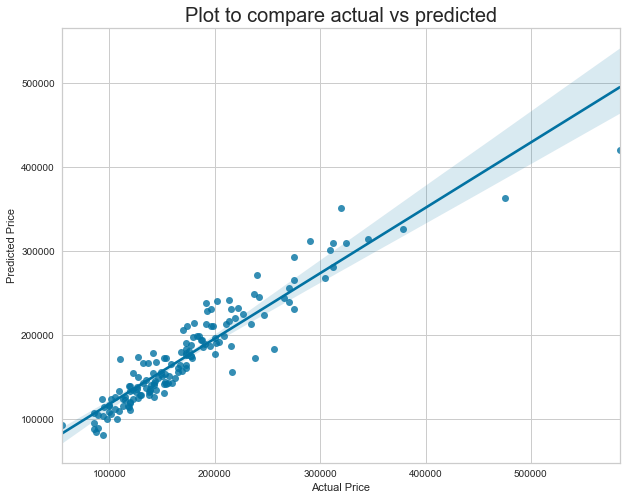

In [121]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=valid_pred, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")
plt.show()

The RMSE score for validation set is 26204 which is lower than training set used. This means the model can generalize any incoming data for prediction.

## Part 5 Conclusion

Provide a brief summary of your results, and a brief discussion of what you have learned about the data and your model. 

The final model worked very good for existing and new data. I have learned that various models can be tested and tried to get excellent results. 

## Appendix: Using PyCaret

In [122]:
exp_reg = setup(data = df, target = 'price', session_id=0, normalize=True, 
                train_size=0.8, ) 

,Description,Value
0,session_id,0
1,Target,price
2,Original Data,"(834, 9)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(667, 31)"


In [123]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr',
                        'ada','mlp','llar','lightgbm','lar','dummy'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,19259.7636,805836602.5451,28248.1442,0.8400,0.1539,0.1153,0.1740
lasso,Lasso Regression,20200.6510,822016391.7827,28493.7402,0.8381,0.1593,0.1211,0.0240
lr,Linear Regression,20214.6420,824248292.9158,28539.1736,0.8376,0.1599,0.1214,1.0600
ridge,Ridge Regression,20301.9376,835800886.0451,28759.6180,0.8343,0.1611,0.1226,0.0120
gbr,Gradient Boosting Regressor,20695.1831,921481192.5766,30013.4846,0.8177,0.1584,0.1230,0.0720
rf,Random Forest Regressor,20697.4634,924100733.1117,30303.0532,0.8164,0.1627,0.1236,0.2100
knn,K Neighbors Regressor,21224.9280,1064124604.3336,32466.1348,0.7896,0.1695,0.1238,0.0200
en,Elastic Net,27750.4625,1566554676.9738,39350.0898,0.6952,0.2033,0.1652,0.0100
dt,Decision Tree Regressor,27297.1065,1735956864.8913,41217.5668,0.6453,0.2164,0.1593,0.0160


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [124]:
model_selected = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22147.0076,1354590218.7312,36804.7581,0.8303,0.1503,0.1165
1,17313.6419,531562470.6341,23055.6386,0.8682,0.1319,0.1043
2,18993.3109,776968705.4841,27874.1584,0.7663,0.1714,0.1245
3,21151.0543,803405149.6788,28344.4024,0.7489,0.1959,0.1420
4,17272.6522,516017559.1077,22716.0199,0.9041,0.1536,0.1138
5,19612.8849,780643440.8798,27939.9972,0.7883,0.1489,0.1127
6,17929.2519,751945135.1211,27421.6180,0.8579,0.1485,0.1059
7,20185.1394,827984873.6757,28774.7263,0.8327,0.1431,0.1104
8,27262.0120,1936663967.0031,44007.5444,0.7859,0.2131,0.1584
9,14696.4006,362776345.2697,19046.6886,0.9277,0.1050,0.0845


In [125]:
print(model_selected)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)


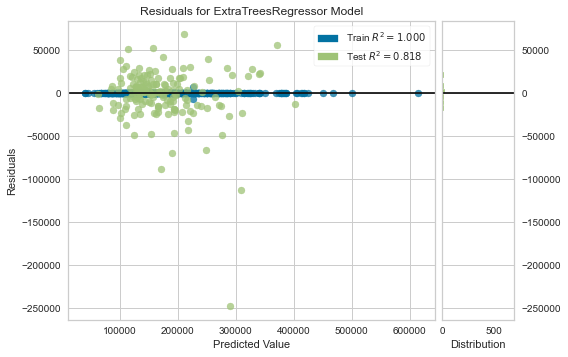

In [126]:
plot_model(model_selected)

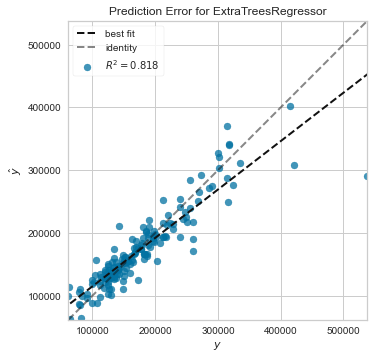

In [127]:
plot_model(model_selected, plot = 'error')

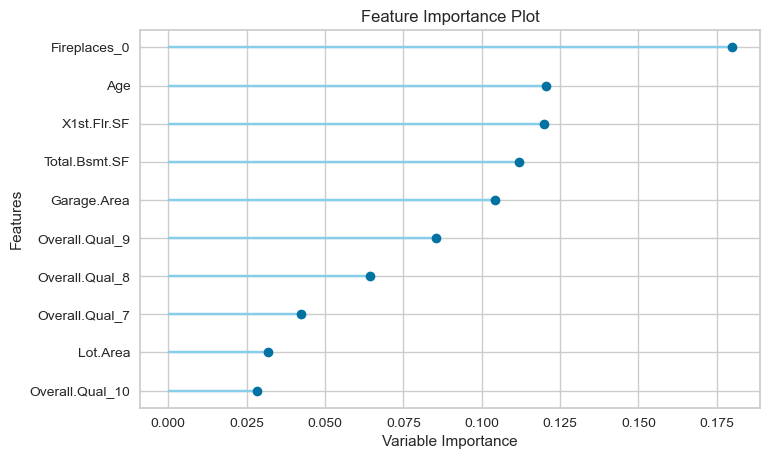

In [128]:
plot_model(model_selected, plot='feature')